In [1]:
# import de la base de données excel
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

data = pd.read_excel('sci.xlsx')
df = data.copy()

In [2]:
df= data.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495514 entries, 0 to 495513
Data columns (total 67 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   id_client                    495514 non-null  int64         
 1   DDefaut_NDB                  495514 non-null  int64         
 2   datdelhis                    495514 non-null  int64         
 3   AGEPRS                       495514 non-null  int64         
 4   ANCIENNETE                   495514 non-null  int64         
 5   CODETAJUR                    495514 non-null  int64         
 6   CODITDBDF_PRO                495514 non-null  int64         
 7   CODNAF2                      495514 non-null  object        
 8   CODTYPPRS                    495514 non-null  int64         
 9   CRTAD_AG_MVTAFF_IND_0010     495514 non-null  int64         
 10  CRTAD_AG_NBECR_A             495514 non-null  int64         
 11  CRTAD_AG_NBECR_B          

Questions à poser au prof : la variable CODPAY_RESIDENCE est elle illégale au sens RGPD ?

In [ ]:
# Suppression des variables illégales
var_illegales = ['CODPAY_NAISSANCE', 'CODPAY_NATIONALITE','CODSEXPRS','CODCMNIEE'] # CODPAY_RESIDENCE
df.drop(columns=var_illegales, inplace=True)

### 0. Vérifications préliminaires

In [4]:
# Vérification des doublons par ligne dans la base de données
print(df.duplicated().sum())

0


In [5]:
# Vérification des doublons par colonnes
all(df['CRTAD_AG_SOLDE_T']==df["CRTAE_AG_SLDEPA"])

False

In [6]:
print(f"{all(df['DATCREENT'==df['DATCREPRSENT']])=}")
df.drop(columns=['DATCREPRSENT'],inplace=True)

all(df['DATCREENT'==df['DATCREPRSENT']])=True


##### Identification des variables catégorielles

In [7]:
import importlib
import functions 
importlib.reload(functions)

low_unique_vars,unique_count = functions.find_categorical_variables(df, 30)

----- Resultats -----
Nombre de variables avec peu de modalités: 20

 Variables :
  - DDefaut_NDB (Nbre de valeurs uniques: 2)
  - datdelhis (Nbre de valeurs uniques: 6)
  - CODITDBDF_PRO (Nbre de valeurs uniques: 2)
  - CODNAF2 (Nbre de valeurs uniques: 4)
  - CODTYPPRS (Nbre de valeurs uniques: 2)
  - CRTAD_IND_0062 (Nbre de valeurs uniques: 7)
  - CRTOD_CMT_PRO_IND_0209 (Nbre de valeurs uniques: 1)
  - CRTOP_AG_IND_0038 (Nbre de valeurs uniques: 1)
  - CRTOP_IND_0038 (Nbre de valeurs uniques: 1)
  - CRTOU_CCT_PRO_IND_0209 (Nbre de valeurs uniques: 1)
  - DATCREENT (Nbre de valeurs uniques: 0)
  - INDPARDCD (Nbre de valeurs uniques: 1)
  - RATIO1 (Nbre de valeurs uniques: 1)
  - RATIO3 (Nbre de valeurs uniques: 1)
  - TOP_PRO_ACTIF (Nbre de valeurs uniques: 1)
  - IND_ACTIF (Nbre de valeurs uniques: 1)
  - IND_PER_PM (Nbre de valeurs uniques: 2)
  - CODPAY_RESIDENCE (Nbre de valeurs uniques: 5)
  - secteur_activite (Nbre de valeurs uniques: 1)
  - secteur_activite_bis (Nbre de valeur

In [8]:
# Retrait de la variable CRTAD_IND_0062 car elle est quantitative discrète
categorical_vars = [ col for col in low_unique_vars if col != "CRTAD_IND_0062"]
print(categorical_vars)

['DDefaut_NDB', 'datdelhis', 'CODITDBDF_PRO', 'CODNAF2', 'CODTYPPRS', 'CRTOD_CMT_PRO_IND_0209', 'CRTOP_AG_IND_0038', 'CRTOP_IND_0038', 'CRTOU_CCT_PRO_IND_0209', 'DATCREENT', 'INDPARDCD', 'RATIO1', 'RATIO3', 'TOP_PRO_ACTIF', 'IND_ACTIF', 'IND_PER_PM', 'CODPAY_RESIDENCE', 'secteur_activite', 'secteur_activite_bis']


In [9]:
# Variables à exclure car elles n'ont qu'une modalité
uniq_mod,unique_count = functions.find_categorical_variables(df, 2)

# Listes des variables catégorielles et des variables continues
selected_categorical_vars = [ col for col in categorical_vars if col not in uniq_mod]
print(len(selected_categorical_vars))


cont_vars = [ col for col in df.columns if (col not in categorical_vars) and (col not in uniq_mod) and col != 'id_client']
print(len(cont_vars))

----- Resultats -----
Nombre de variables avec peu de modalités: 12

 Variables :
  - CRTOD_CMT_PRO_IND_0209 (Nbre de valeurs uniques: 1)
  - CRTOP_AG_IND_0038 (Nbre de valeurs uniques: 1)
  - CRTOP_IND_0038 (Nbre de valeurs uniques: 1)
  - CRTOU_CCT_PRO_IND_0209 (Nbre de valeurs uniques: 1)
  - DATCREENT (Nbre de valeurs uniques: 0)
  - INDPARDCD (Nbre de valeurs uniques: 1)
  - RATIO1 (Nbre de valeurs uniques: 1)
  - RATIO3 (Nbre de valeurs uniques: 1)
  - TOP_PRO_ACTIF (Nbre de valeurs uniques: 1)
  - IND_ACTIF (Nbre de valeurs uniques: 1)
  - secteur_activite (Nbre de valeurs uniques: 1)
  - secteur_activite_bis (Nbre de valeurs uniques: 1)
---------------------------

7
42


In [34]:
selected_categorical_vars

['DDefaut_NDB',
 'datdelhis',
 'CODITDBDF_PRO',
 'CODNAF2',
 'CODTYPPRS',
 'IND_PER_PM',
 'CODPAY_RESIDENCE']

Identification des variables à une modalité au plus pour description des individus de la bdd

In [10]:
for col in uniq_mod:
    print(f"{col} : {df[col].unique()}")

CRTOD_CMT_PRO_IND_0209 : [0]
CRTOP_AG_IND_0038 : [0]
CRTOP_IND_0038 : [0]
CRTOU_CCT_PRO_IND_0209 : [0]
DATCREENT : [nan]
INDPARDCD : [ 0. nan]
RATIO1 : [0]
RATIO3 : [0]
TOP_PRO_ACTIF : ['O']
IND_ACTIF : [1]
secteur_activite : ['SCI']
secteur_activite_bis : ['SCI']


In [11]:
# Retrait des variables à modalité unique
df.drop(columns=uniq_mod,inplace=True)

In [12]:
print("Database avant les modifications")
df.info()
# Changer le type des variables catégorielles
categorical_vars_to_convert = [col for col in selected_categorical_vars if col not in ["datdelhis","DDefaut_NDB"]]
df[categorical_vars_to_convert] = df[categorical_vars_to_convert].astype('category')

Database avant les modifications
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495514 entries, 0 to 495513
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   id_client                    495514 non-null  int64 
 1   DDefaut_NDB                  495514 non-null  int64 
 2   datdelhis                    495514 non-null  int64 
 3   AGEPRS                       495514 non-null  int64 
 4   ANCIENNETE                   495514 non-null  int64 
 5   CODETAJUR                    495514 non-null  int64 
 6   CODITDBDF_PRO                495514 non-null  int64 
 7   CODNAF2                      495514 non-null  object
 8   CODTYPPRS                    495514 non-null  int64 
 9   CRTAD_AG_MVTAFF_IND_0010     495514 non-null  int64 
 10  CRTAD_AG_NBECR_A             495514 non-null  int64 
 11  CRTAD_AG_NBECR_B             495514 non-null  int64 
 12  CRTAD_AG_NBJDE_BA            495514 non

In [13]:
print("Database après les modifications")

df.info()

Database après les modifications
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 495514 entries, 0 to 495513
Data columns (total 50 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   id_client                    495514 non-null  int64   
 1   DDefaut_NDB                  495514 non-null  int64   
 2   datdelhis                    495514 non-null  int64   
 3   AGEPRS                       495514 non-null  int64   
 4   ANCIENNETE                   495514 non-null  int64   
 5   CODETAJUR                    495514 non-null  int64   
 6   CODITDBDF_PRO                495514 non-null  category
 7   CODNAF2                      495514 non-null  category
 8   CODTYPPRS                    495514 non-null  category
 9   CRTAD_AG_MVTAFF_IND_0010     495514 non-null  int64   
 10  CRTAD_AG_NBECR_A             495514 non-null  int64   
 11  CRTAD_AG_NBECR_B             495514 non-null  int64   
 12  CRTAD_AG_NB

# I. Identification de la variable cible et analyse des variables explicatives

## I.1. La variable cible 

In [14]:
cible = "DDefaut_NDB"
print("Initial type of target column")
print(df[[cible]].dtypes)

Initial type of target column
DDefaut_NDB    int64
dtype: object


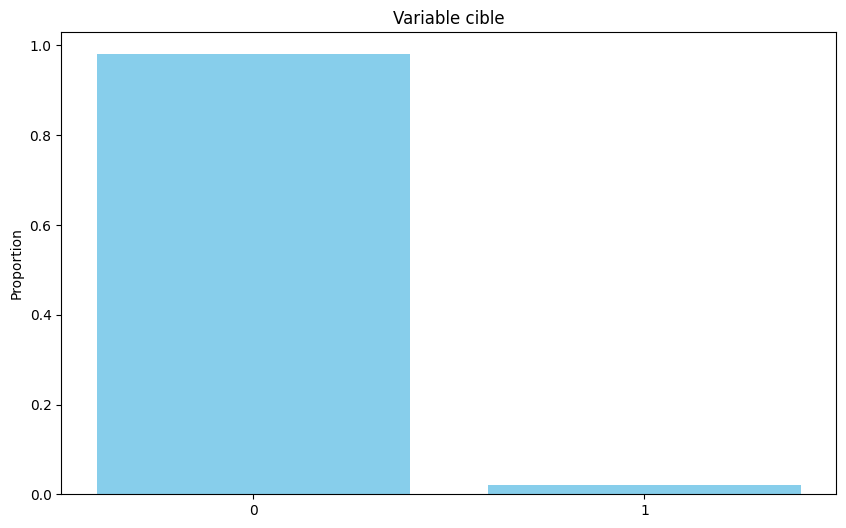

In [15]:

import matplotlib.pyplot as plt

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(df[cible].value_counts().index.astype(str), df[cible].value_counts(normalize=True), color='skyblue')

plt.ylabel('Proportion')
plt.title('Variable cible')

plt.show()

In [16]:
#Transformer le format de date :
print("Nombre de dates : ",df[['datdelhis']].nunique())
print("Format de date initial: ", df[['datdelhis']].dtypes)


df['datdelhis'] = pd.to_datetime(df['datdelhis'], format = '%Y%m')
print("Format de date final: ", df[['datdelhis']].dtypes)


Nombre de dates :  datdelhis    6
dtype: int64
Format de date initial:  datdelhis    int64
dtype: object
Format de date final:  datdelhis    datetime64[ns]
dtype: object


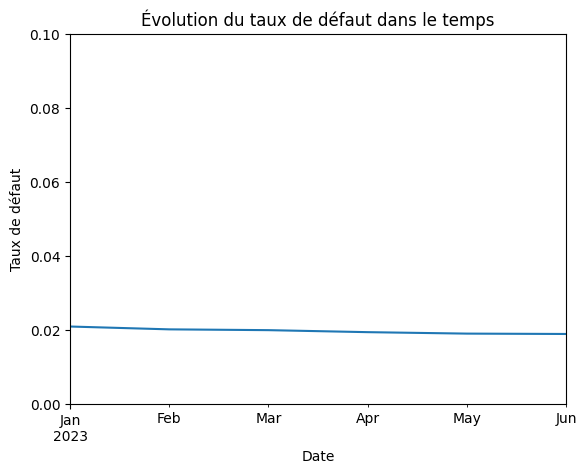

In [17]:
# Evolution de la variable cible dans le temps
import matplotlib.pyplot as plt

taux_cible = df.groupby(df['datdelhis'].dt.to_period('M'))['DDefaut_NDB'].mean() # ou sum()

# Tracer le taux de la variable cible au fil du temps
taux_cible.plot(title='Évolution du taux de défaut dans le temps')
plt.xlabel('Date')
plt.ylabel('Taux de défaut')
plt.ylim(0,0.1)
plt.show()

## I.2. Construction de la base d'échantillon

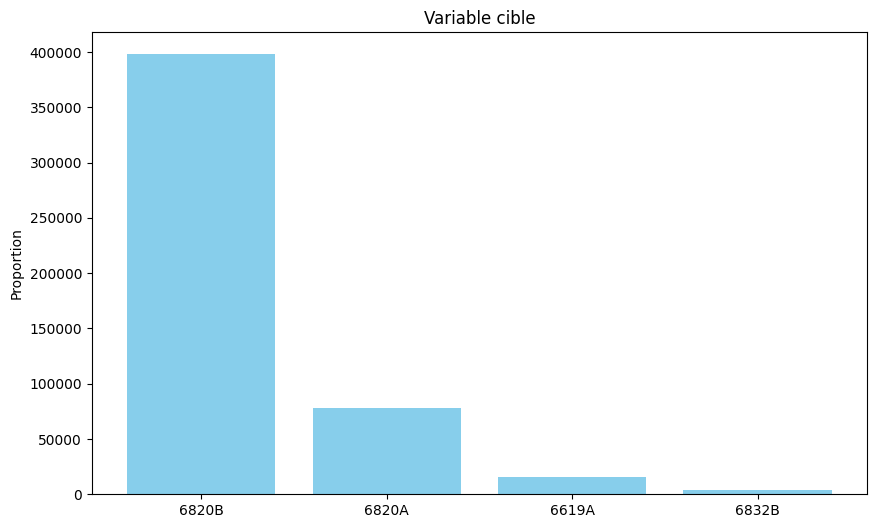

In [18]:
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(df['CODNAF2'].value_counts().index.astype(str), df['CODNAF2'].value_counts(), color='skyblue')

plt.ylabel('Proportion')
plt.title('Variable cible')

plt.show()

In [ ]:
# Identification des variables catégorielles pouvant générer un biais de sélection dans le modèle
# Ces variables n'apportent aucune information pour la prédition de la variable cible car elles ne sont pas discrimantes

importlib.reload(functions)
var_surep, details = functions.find_uniq_mod_variables(df, selected_categorical_vars, 0.99)
var_surep = [col for col in var_surep if col not in ["DDefaut_NDB"]]

details


{'CODITDBDF_PRO': {0: 0.9965873819912253, 2: 0.0034126180087747267},
 'CODTYPPRS': {2: 0.9949870235755196, 1: 0.005012976424480438},
 'IND_PER_PM': {'PM': 0.9949870235755196, 'PP': 0.005012976424480438},
 'CODPAY_RESIDENCE': {'FRA': 0.9996549037968655,
  '999': 0.00016144851608632652,
  'MCO': 0.00015943040963524744,
  'GBR': 1.210863870647449e-05,
  'USA': 1.210863870647449e-05}}

In [20]:
## Creation des echantillons train et test 
from sklearn.model_selection import train_test_split

# Retrait des mauvaises variables de prédictions (variables ne prenant pratiquement qu'une seule modalité)
df_copy = df.copy()
X = df_copy.drop(columns = [cible, "id_client"] + var_surep)
y = df_copy[cible]
X['stratify_col'] = df_copy[cible].astype(str) + '_' + df_copy['datdelhis'].astype(str) + '_' +  df_copy['CODNAF2'].astype(str) 

# Split train-test stratifié en utilisant la colonne combinée
X_train, X_test, y_train, y_test = train_test_split(
    X,  y,
    stratify=X['stratify_col'],  # La nouvelle colonne pour la stratification
    test_size=0.2,                # La proportion de l'ensemble de test
    random_state=42               # La graine pour la reproductibilité
)


In [21]:
# Suppression de la colonne de stratification car non utile pour la suite
X_train = X_train.drop(['stratify_col'], axis=1)
X_test = X_test.drop(['stratify_col'], axis=1)

In [43]:
#df.info()
# 64 colonnes au total, 56 colonnes de type float ou int, 
# 6 colonnes de type object (supposées qualitatives), 
# 2 colonnes de types date
print(selected_categorical_vars)
print(var_surep)

['DDefaut_NDB', 'datdelhis', 'CODITDBDF_PRO', 'CODNAF2', 'CODTYPPRS', 'IND_PER_PM', 'CODPAY_RESIDENCE']
['CODITDBDF_PRO', 'CODTYPPRS', 'IND_PER_PM', 'CODPAY_RESIDENCE']


#### I.2.1 Analyse de la représentativité des variables 

In [23]:
# Vérification de la répartition de la variable cible dans le train et le test

print("Répartition de la cible dans le train :")
print(y_train.value_counts(normalize=True))

print("\nRépartition de la cible dans le test :")
print(y_test.value_counts(normalize=True))


Répartition de la cible dans le train :
DDefaut_NDB
0    0.980374
1    0.019626
Name: proportion, dtype: float64

Répartition de la cible dans le test :
DDefaut_NDB
0    0.980374
1    0.019626
Name: proportion, dtype: float64


In [24]:
#### On verifie que la repartition des elements ayant servis à la stratification est la même dans nos echantillons train et test
# Vérification de la répartition des combinaisons dans la colonne de stratification

print("Répartition relative des dates d'observation dans le train :")
print(X_train['datdelhis'].value_counts(normalize=True))

print("\nRépartition relative des dates d'observation dans le test :")
print(X_test['datdelhis'].value_counts(normalize=True))



Répartition relative des dates d'observation dans le train :
datdelhis
2023-06-01    0.168388
2023-05-01    0.167720
2023-04-01    0.167236
2023-03-01    0.166620
2023-02-01    0.166040
2023-01-01    0.163996
Name: proportion, dtype: float64

Répartition relative des dates d'observation dans le test :
datdelhis
2023-06-01    0.168380
2023-05-01    0.167704
2023-04-01    0.167220
2023-03-01    0.166635
2023-02-01    0.166049
2023-01-01    0.164011
Name: proportion, dtype: float64


In [25]:

print("Répartition relative du secteur d'activité dans le train :")
print(X_train['CODNAF2'].value_counts(normalize=True))

print("\nRépartition relative du secteur d'activité dans le test :")
print(X_test['CODNAF2'].value_counts(normalize=True))

Répartition relative du secteur d'activité dans le train :
CODNAF2
6820B    0.803028
6820A    0.157569
6619A    0.032411
6832B    0.006993
Name: proportion, dtype: float64

Répartition relative du secteur d'activité dans le test :
CODNAF2
6820B    0.803033
6820A    0.157584
6619A    0.032401
6832B    0.006983
Name: proportion, dtype: float64


In [26]:
#### On peut également s'assurer que la distribution des variables continues est la même dans notre train et dans notre test 
#### Ce qui pourrait indiquer que notre stratification a capté l'ensemble des variables importantes.

### Nous avons donc choisi quelques variables que nous estimions pertinentes pour ce faire

# Liste des variables continues à analyser
var_a_analyser = ['AGEPRS','ANCIENNETE', 'CRTAD_AG_MVTAFF_IND_0010', 'CRTAD_AG_SOLDE_IND_0009', 
                       'CRTAR_IND_0036', 'CRTAD_AG_NBJDE_BA', 'CRTAD_IND_0062']


La variable "AGEPRS" est probablement à supprimer

##### Analyses visuelles des distributions (KDE)


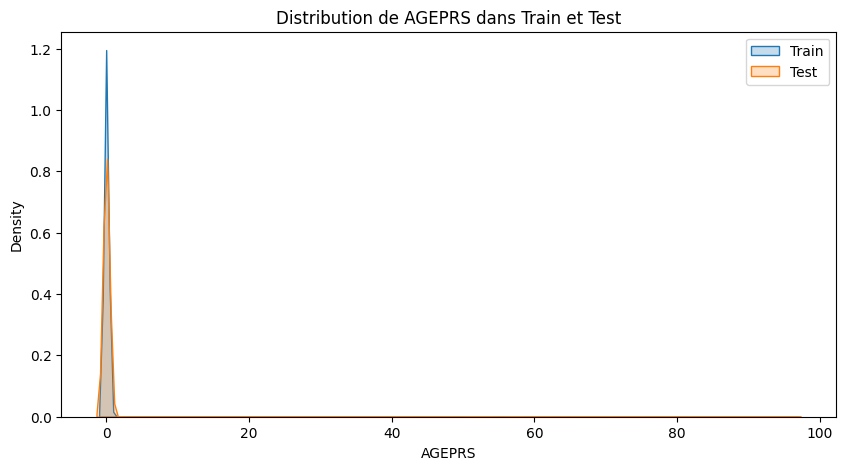

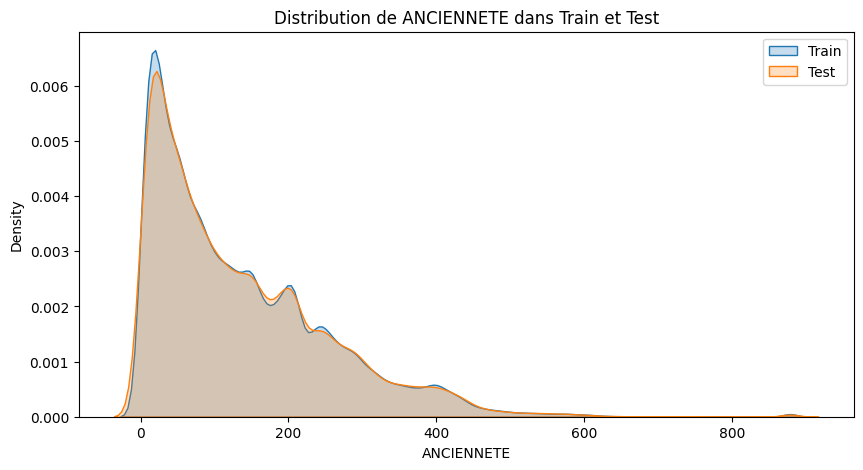

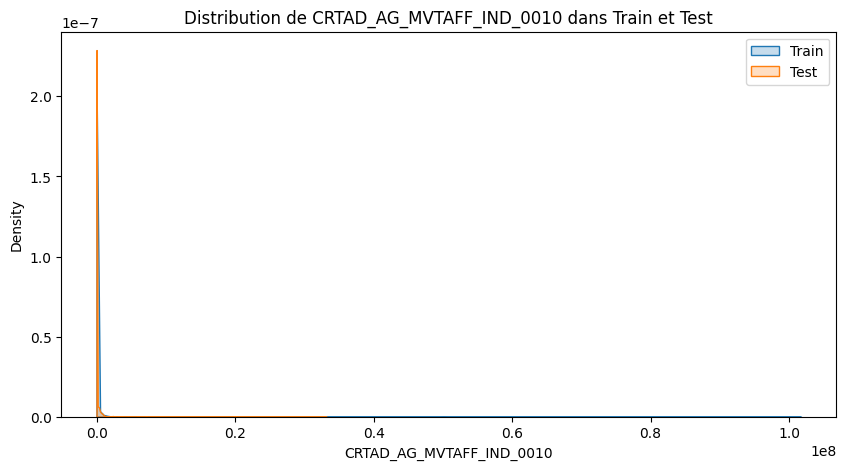

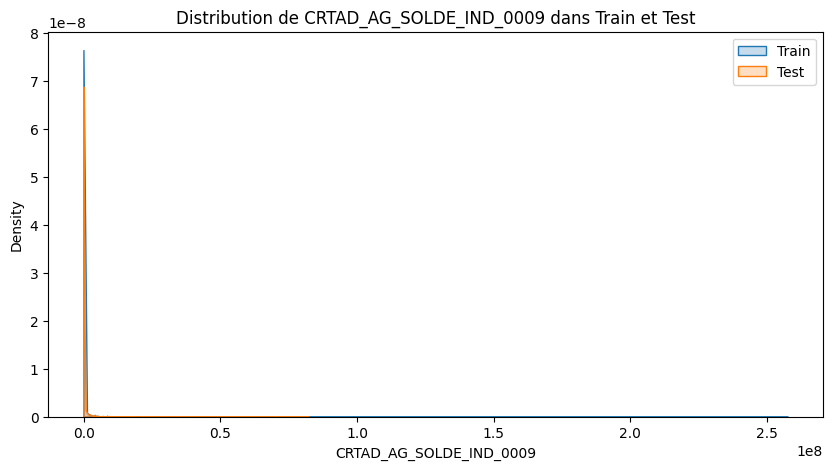

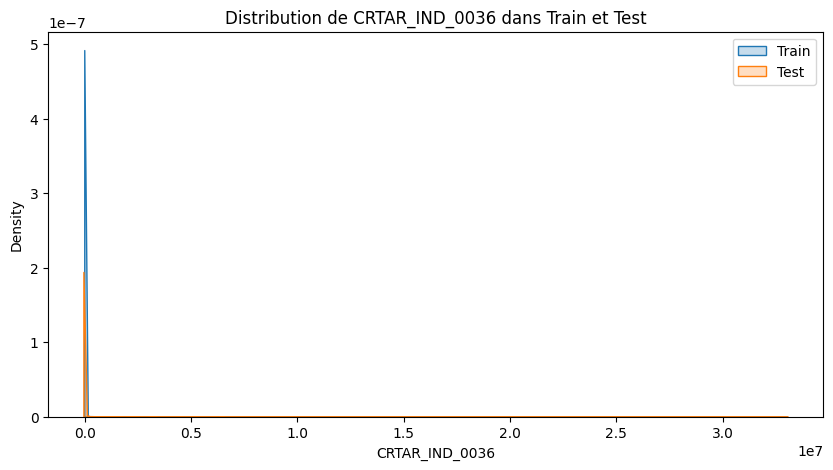

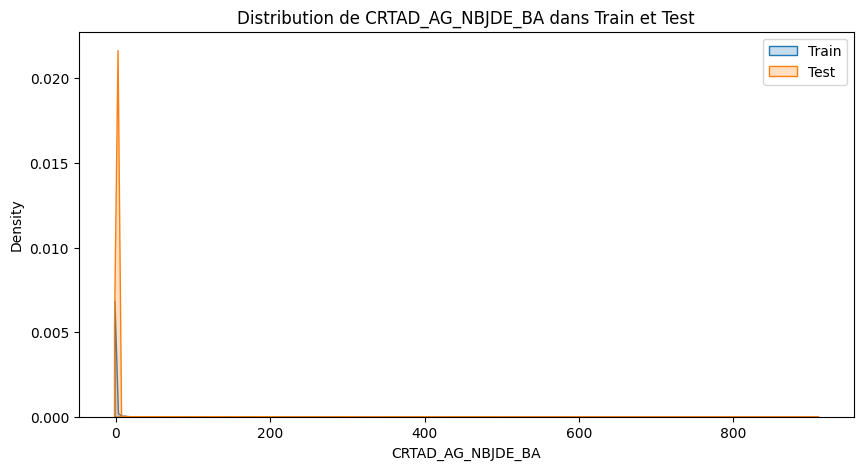

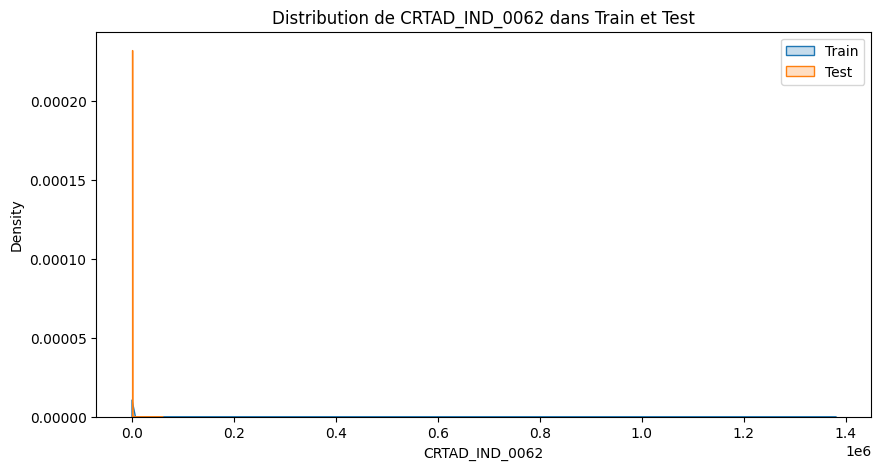

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


# Comparer les distributions des variables continues dans train et test
for col in var_a_analyser:
    plt.figure(figsize=(10, 5))
    sns.kdeplot(X_train[col], label='Train', shade=True)
    sns.kdeplot(X_test[col], label='Test', shade=True)
    plt.title(f"Distribution de {col} dans Train et Test")
    plt.legend()
    plt.show()

In [27]:
# Comparer la distribution de chaque variable continue dans le train et le test

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas as pd


# Comparer la distribution de chaque variable continue dans le train et le test
for var in var_a_analyser:
    # Calcul des statistiques descriptives pour train et test
    print(f"Statistiques descriptives de {var} dans le train :")
    print(X_train[var].describe())
    print(f"\nStatistiques descriptives de {var} dans le test :")
    print(X_test[var].describe())
    
    # Test de Kolmogorov-Smirnov pour vérifier si les distributions sont similaires
    ks_stat, ks_p_value = stats.ks_2samp(X_train[var], X_test[var])
    print(f"\nTest de Kolmogorov-Smirnov pour {var}: p-value = {ks_p_value}")
    if ks_p_value > 0.05:
        print("Les distributions sont similaires (p-value > 0.05).")
    else:
        print("Les distributions ne sont pas similaires (p-value < 0.05).")
    print("\n" + "-"*50)




Statistiques descriptives de AGEPRS dans le train :
count    396411.000000
mean          0.300315
std           4.372487
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          96.000000
Name: AGEPRS, dtype: float64

Statistiques descriptives de AGEPRS dans le test :
count    99103.000000
mean         0.319910
std          4.545119
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         96.000000
Name: AGEPRS, dtype: float64

Test de Kolmogorov-Smirnov pour AGEPRS: p-value = 1.0
Les distributions sont similaires (p-value > 0.05).

--------------------------------------------------
Statistiques descriptives de ANCIENNETE dans le train :
count    396411.000000
mean        134.365999
std         119.423212
min           0.000000
25%          39.000000
50%         101.000000
75%         202.000000
max         881.000000
Name: ANCIENNETE, dtype: float64

Statistiques descriptives de ANCIENNETE dans 

In [30]:
importlib.reload(functions)
var_dif_dist=functions.extract_vars_dif_dist(var_a_analyser,X_train, X_test)
len(var_dif_dist)

Statistiques descriptives pour AGEPRS :
Train :
count    396411.000000
mean          0.300315
std           4.372487
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          96.000000
Name: AGEPRS, dtype: float64
Test :
count    99103.000000
mean         0.319910
std          4.545119
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         96.000000
Name: AGEPRS, dtype: float64

Test de Kolmogorov-Smirnov pour AGEPRS : p-value = 1.000000
-> Les distributions sont similaires (p-value >= 0.05).

--------------------------------------------------
Statistiques descriptives pour ANCIENNETE :
Train :
count    396411.000000
mean        134.365999
std         119.423212
min           0.000000
25%          39.000000
50%         101.000000
75%         202.000000
max         881.000000
Name: ANCIENNETE, dtype: float64
Test :
count    99103.000000
mean       134.638881
std        119.710943
min          0.0

0

## I.3. Création de nouveaux indicateurs et pré-sélection des variables candidates à l’explication de la variable cible

#### I.3.1 Pré-selection des variables

##### On s'assure que nos données soient :

##### Fiables

In [31]:
### Fiables
# Calculer le taux de valeurs manquantes (en pourcentage) pour chaque colonne
missing_percentages = X_train.isna().mean() * 100

# Filtrer uniquement les colonnes avec des valeurs manquantes
missing_columns = missing_percentages[missing_percentages > 0]

# Afficher le nombre de colonnes avec des valeurs manquantes
print(f"Nombre de colonnes avec des valeurs manquantes : {len(missing_columns)}")

# Afficher le taux de valeurs manquantes uniquement pour ces colonnes
print("\nTaux de valeurs manquantes par colonne (%):")
print(missing_columns)


Nombre de colonnes avec des valeurs manquantes : 0

Taux de valeurs manquantes par colonne (%):
Series([], dtype: float64)


###  On éludera le traitement des outliers ici vu que l'on segmentera nos données plustard

##### Verifions que nos données catégorielles sont homogènes dans le temps, qu'il n'y a pas apparition et disparition  d'une modalité par exemple


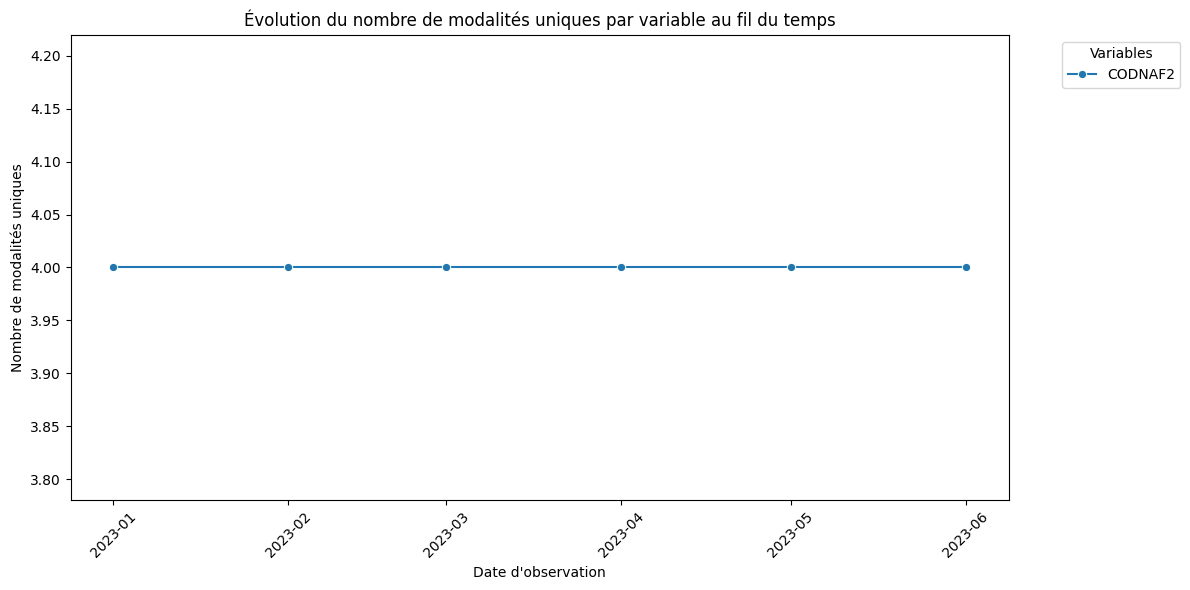

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Créer un DataFrame vide pour stocker les informations pour la visualisation
modalities_over_time = []
cat_var = [ col for col in selected_categorical_vars if col not in ["DDefaut_NDB", "datdelhis"]+var_surep]

# Itérer sur les dates d'observation dans la colonne 'datdelhis'
for date in X_train['datdelhis'].unique():
    # Filtrer les données pour la date spécifique
    filtered_data = X_train[X_train['datdelhis'] == date]
    
    # Boucle sur chaque colonne catégorielle
    for col in cat_var:
        # Compter les modalités uniques pour cette date et colonne
        modalities = filtered_data[col].unique()  # Valeurs distinctes des modalités
        modalities_count = len(modalities)  # Compter le nombre de modalités uniques
        
        # Ajouter les résultats à la liste
        modalities_over_time.append({
            'date': date,
            'variable': col,
            'modalities_count': modalities_count
        })

# Convertir la liste en DataFrame pour faciliter la visualisation
modalities_df = pd.DataFrame(modalities_over_time)

# Affichage des modalités par date et variable
plt.figure(figsize=(12, 6))
sns.lineplot(data=modalities_df, x='date', y='modalities_count', hue='variable', marker='o')

# Améliorer l'apparence du graphique
plt.title("Évolution du nombre de modalités uniques par variable au fil du temps")
plt.xlabel("Date d'observation")
plt.ylabel("Nombre de modalités uniques")
plt.xticks(rotation=45)  # Rotation des dates pour une meilleure lisibilité
plt.legend(title="Variables", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Afficher le graphique
plt.show()


#### On s'assure de la cohérence et de la pertinence des variables de notre base

In [59]:
# Calcul des statistiques descriptives pour la colonne 'ANCIENNETE'
anciennete_stats = X_train['ANCIENNETE'].describe()

# Affichage des statistiques descriptives
print("Statistiques descriptives de la colonne 'ANCIENNETE' :")
print(anciennete_stats)

Statistiques descriptives de la colonne 'ANCIENNETE' :
count    396411.000000
mean        134.365999
std         119.423212
min           0.000000
25%          39.000000
50%         101.000000
75%         202.000000
max         881.000000
Name: ANCIENNETE, dtype: float64


In [48]:
### Cette variable doit probablement être exprimée en jours et non en mois comme stipulé dans l'énoncé

#### I.3.2 Creation de nouveaux indicateurs

In [ ]:
X_train['SECTNAF'] = X_train['CODNAF2'].str[-1]  ### On regroupe les seceurs d'activité en deux
#df["ANCENT"]= df['datdelhis'].dt.month - df['DATCREENT'].dt.month  ### On cree une nouvelle variable pour l'ancienneté de la SCI

cat_var = cat_var + ['SECTNAF']
## cet indicateur ne pourra pas être calculé anyway

In [65]:
#### On construit une nouvelle variable matérialisant l'ancienneté de la relation entre la SCI et la LCL
#### mais cette fois exprimée en mois

# Conversion de l'ancienneté (en jours) en mois (approximativement 30 jours par mois)
X_train['ANCIENNETE_MOIS'] = df['ANCIENNETE'] / 30
X_train['ANCIENNETE_MOIS'].describe()

cont_vars = cont_vars + ['ANCIENNETE_MOIS']

# II- Selection des variables

### II.1. Statistiques descriptitves univariées des variables continues
Les variables catégorielles ont déja été traitées dans la partie précédente (au niveau de la stratification de la base)

In [66]:
cont_vars
print(cont_vars)
len(cont_vars)

['AGEPRS', 'ANCIENNETE', 'CODETAJUR', 'CRTAD_AG_MVTAFF_IND_0010', 'CRTAD_AG_NBECR_A', 'CRTAD_AG_NBECR_B', 'CRTAD_AG_NBJDE_BA', 'CRTAD_AG_NBJDE_BB', 'CRTAD_AG_NBJDE_BC', 'CRTAD_AG_SOLDE_IND_0009', 'CRTAD_AG_SOLDE_T', 'CRTAD_AG_SOLDE_T1', 'CRTAD_AG_SOLDE_T2', 'CRTAD_AG_SOLDE_T3', 'CRTAD_AG_SOLDE_T4', 'CRTAD_IND_0015', 'CRTAD_IND_0038', 'CRTAD_IND_0062', 'CRTAD_IND_0205', 'CRTAE_AG_SLDEPA', 'CRTAR_IND_0036', 'CRTOC_AG_LIGCRE_2T_IND_0009', 'CRTOC_AG_LIGCRE_IND_0009', 'CRTOC_AG_LIGDEB_2T_IND_0015', 'CRTOC_AG_LIGDEB_IND_0015', 'CRTOC_AG_MVTAFF_2T_IND_0010', 'CRTOC_AG_MVTAFF_IND_0010', 'CRTOC_AG_NBJCRE_2T_IND_0009', 'CRTOC_AG_NBJDEB_2T_IND_0015', 'CRTOC_AG_NBJDEB_IND_0015', 'CRTOC_IND_0010', 'CRTOC_IND_0015', 'CRTOC_IND_0164', 'CRTOC_IND_0301', 'CRTOC_MOY_MVTAFF_IND_0010', 'CRTOC_SLD_MOY', 'CRTOD_CMT_IND_0036', 'DATRLNORG', 'MINSOLDE_PAR', 'NBECR_PAR', 'CRTAD_IND_0042', 'CODACVPRO', 'ANCIENNETE_MOIS']


43

In [74]:
importlib.reload(functions)
summary_=functions.summarize_continuous_vars(X_train,cont_vars)

functions.summarize_distribution_table(summary_)

{'High Dispersion (CV > 1)': ['AGEPRS',
  'CRTAD_AG_MVTAFF_IND_0010',
  'CRTAD_AG_NBECR_A',
  'CRTAD_AG_NBECR_B',
  'CRTAD_AG_NBJDE_BA',
  'CRTAD_AG_NBJDE_BB',
  'CRTAD_AG_NBJDE_BC',
  'CRTAD_AG_SOLDE_IND_0009',
  'CRTAD_AG_SOLDE_T',
  'CRTAD_AG_SOLDE_T1',
  'CRTAD_AG_SOLDE_T2',
  'CRTAD_AG_SOLDE_T3',
  'CRTAD_AG_SOLDE_T4',
  'CRTAD_IND_0015',
  'CRTAD_IND_0038',
  'CRTAD_IND_0062',
  'CRTAD_IND_0205',
  'CRTAE_AG_SLDEPA',
  'CRTAR_IND_0036',
  'CRTOC_AG_LIGCRE_2T_IND_0009',
  'CRTOC_AG_LIGCRE_IND_0009',
  'CRTOC_AG_LIGDEB_2T_IND_0015',
  'CRTOC_AG_LIGDEB_IND_0015',
  'CRTOC_AG_MVTAFF_2T_IND_0010',
  'CRTOC_AG_MVTAFF_IND_0010',
  'CRTOC_AG_NBJDEB_2T_IND_0015',
  'CRTOC_AG_NBJDEB_IND_0015',
  'CRTOC_IND_0010',
  'CRTOC_IND_0015',
  'CRTOC_IND_0164',
  'CRTOC_IND_0301',
  'CRTOC_MOY_MVTAFF_IND_0010',
  'CRTOC_SLD_MOY',
  'CRTOD_CMT_IND_0036',
  'MINSOLDE_PAR',
  'NBECR_PAR',
  'CRTAD_IND_0042',
  'CODACVPRO'],
 'Low Dispersion (CV < 0.1)': ['CODETAJUR', 'DATRLNORG'],
 'Highly Skewed (Ske

In [ ]:
### aNALYSE VISUELLE DES VARIABLES CONTINUES